# Decision model visualization

This notebook is for visualizing the decision model and create the graphs for the paper.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "rmfamily"
})
plt.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

In [10]:
def expected_cost(
    p_pest,                     # probability of pest occurence
    treatment,                  # treatment indicator (decision variable)
    e_c_loss_treatment,         # expected cost of yield loss given treatment
    e_c_loss_no_treatment,      # expected cost of yield loss given no treatment
    e_c_treatment_treatment,    # expected cost of treatment given treatment
):
    e_c_loss_pest = treatment * e_c_loss_treatment \
             + (1-treatment) * e_c_loss_no_treatment
    e_c_loss = p_pest * e_c_loss_pest
    
    e_c_treatment = treatment * e_c_treatment_treatment
    return e_c_loss + e_c_treatment


def expected_hat_cost(
    p_pest,                     # probability of pest occurence
    treatment,                  # treatment indicator (decision variable)
    e_c_loss_treatment,         # expected cost of yield loss given treatment
    e_c_loss_no_treatment,      # expected cost of yield loss given no treatment
    e_c_treatment_treatment,    # expected cost of treatment given treatment
):
    e_c = expected_cost(
        p_pest,
        treatment,
        e_c_loss_treatment,
        e_c_loss_no_treatment,
        e_c_treatment_treatment,
    )

    shift = p_pest * e_c_loss_no_treatment
    return e_c - shift

def e_c_hat_given_no_ppi(
    p_pest,                     # probability of pest occurence
    e_c_loss_treatment,         # expected cost of yield loss given treatment
    e_c_loss_no_treatment,      # expected cost of yield loss given no treatment
    e_c_treatment_treatment,    # expected cost of treatment given treatment
):
    e_c_treatment = expected_hat_cost(
        p_pest,
        1,
        e_c_loss_treatment,
        e_c_loss_no_treatment,
        e_c_treatment_treatment,
    )
    e_c_no_treatment = expected_hat_cost(
        p_pest,
        0,
        e_c_loss_treatment,
        e_c_loss_no_treatment,
        e_c_treatment_treatment,
    )
    return np.minimum(e_c_treatment, e_c_no_treatment)

def e_c_hat_given_ppi(
    p_pest,                     # probability of pest occurence
    e_c_loss_treatment,         # expected cost of yield loss given treatment
    e_c_loss_no_treatment,      # expected cost of yield loss given no treatment
    e_c_treatment_treatment,    # expected cost of treatment given treatment
):
    return p_pest * expected_hat_cost(
        1,
        1,
        e_c_loss_treatment,
        e_c_loss_no_treatment,
        e_c_treatment_treatment,
    )

def evppi(
    p_pest,                     # probability of pest occurence
    e_c_loss_treatment,         # expected cost of yield loss given treatment
    e_c_loss_no_treatment,      # expected cost of yield loss given no treatment
    e_c_treatment_treatment,    # expected cost of treatment given treatment
):
    return e_c_hat_given_no_ppi(
        p_pest,
        e_c_loss_treatment,
        e_c_loss_no_treatment,
        e_c_treatment_treatment,
    ) - \
    e_c_hat_given_ppi(
        p_pest,
        e_c_loss_treatment,
        e_c_loss_no_treatment,
        e_c_treatment_treatment,
    )

In [11]:

e_c_loss_treatment = 0
e_c_loss_no_treatment = 868 #INR
e_c_treatment_treatment = 795/10 - 24 #INR

e_c_monitoring = 48


In [12]:
turning_point = e_c_treatment_treatment / (e_c_loss_no_treatment - e_c_loss_treatment)

turning_point_value = e_c_hat_given_ppi(
    turning_point,
    e_c_loss_treatment,
    e_c_loss_no_treatment,
    e_c_treatment_treatment,
)

turning_point_evppi = 0 - turning_point_value

print(turning_point)
print(turning_point_evppi)

0.06394009216589862
51.951324884792626


In [13]:
p = np.linspace(0, 1, 1000)
evppi_vec = evppi(
    p,
    e_c_loss_treatment,
    e_c_loss_no_treatment,
    e_c_treatment_treatment,
)

In [14]:
xlabel = r"pest risk $p_\alpha$"
ylabel = r"utility ($\text{INR}\ \cdot\ \text{ha}^{-1}$)"

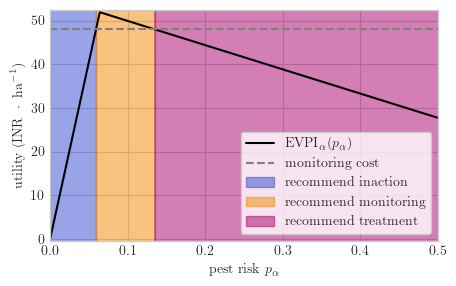

In [16]:
custom_cmap = ['#3449d1', '#f08800', '#a8006d']
fig, ax = plt.subplots(1, figsize=(5, 3))
ax.plot(p, evppi_vec, label=r"$\text{EVPI}_\alpha(p_\alpha)$", color="black")
ax.hlines(e_c_monitoring, 0, 1, linestyles="dashed", label="monitoring cost", color="gray")
ax.fill_between(p, -10, turning_point_evppi+10, where=(evppi_vec <= e_c_monitoring) & (p < turning_point), alpha=0.5, color=custom_cmap[0], label="recommend inaction")
ax.fill_between(p, -10, turning_point_evppi+10, where=evppi_vec > e_c_monitoring-0.02, alpha=0.5, color=custom_cmap[1], label="recommend monitoring")
ax.fill_between(p, -10, turning_point_evppi+10, where=(evppi_vec <= e_c_monitoring) & (p > turning_point), alpha=0.5, color=custom_cmap[2], label="recommend treatment")
legend = ax.legend(frameon=True, loc="upper right")


ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_xlim(0, 0.5)
ax.set_ylim(-0.5, turning_point_evppi+0.5)
ax.legend(loc="lower right", frameon=True)

In [17]:
print("inaction/monitoring decision border: ", e_c_monitoring / (turning_point_evppi / turning_point))
print("inaction/monitoring decision border: ", 1 - e_c_monitoring / (turning_point_evppi / (1-turning_point)))

inaction/monitoring decision border:  0.059076923076923075
inaction/monitoring decision border:  0.1351351351351351


In [18]:
def e_u_gamma(p_alpha, gamma):
    if gamma == 0:
        return p_alpha * 0
    elif gamma == 1:
        return p_alpha * (e_c_loss_no_treatment - e_c_loss_treatment - e_c_treatment_treatment) - e_c_monitoring
    elif gamma == 2:
        return p_alpha * (e_c_loss_no_treatment - e_c_loss_treatment) - e_c_treatment_treatment


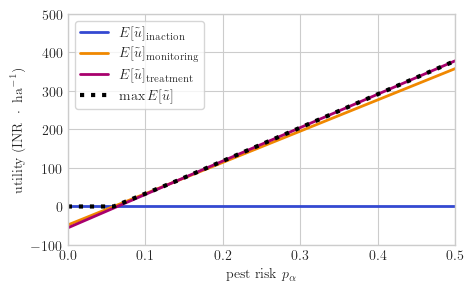

In [19]:
fig, ax = plt.subplots(1, figsize=(5, 3))

e_u_gamma_array= np.empty((len(p), 3), dtype=float)

e_u_gamma_array[:, 0] = e_u_gamma(p, 0)
e_u_gamma_array[:, 1] = e_u_gamma(p, 1)
e_u_gamma_array[:, 2] = e_u_gamma(p, 2)


ax.plot(p, e_u_gamma_array[:, 0], linewidth=2,
        label=r"$E[\tilde u]_\text{inaction}$", color=custom_cmap[0])
ax.plot(p, e_u_gamma_array[:, 1], linewidth=2,
        label=r"$E[\tilde u]_\text{monitoring}$", color=custom_cmap[1])
ax.plot(p, e_u_gamma_array[:, 2], linewidth=2,
        label=r"$E[\tilde u]_\text{treatment}$", color=custom_cmap[2])
ax.plot(p, np.max(e_u_gamma_array, axis=1), linestyle="dotted", linewidth=3, color="black", label=r"$\max E[\tilde u]$")

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_xlim(0, 0.5)
ax.set_ylim(-100, 500)

ax.legend(frameon=True, loc="upper left")